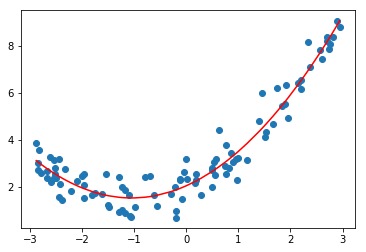

[0.         0.98884412 0.47273629]
2.0517412717485533


In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,0.5,size=100)

from sklearn.preprocessing import PolynomialFeatures#在预处理包中，添加新的特征

poly = PolynomialFeatures(degree=2)#degree:添加几次幂
poly.fit(X)
X2 = poly.transform(X)#此时X2.shape是（100,3）的矩阵，第一列为一列1，即x^0

from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 =  lin_reg2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')#不排序的话绘制出的图因为不是线性的，所以是乱的
plt.show()
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

In [10]:
X = np.arange(1,11).reshape(-1,2)
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape
print(X2)#6列，第一列全为1，第二列为原来第一列，第三列是原来第二列，第四列是原来第一列的平方，
         #第五列是原来第一列乘第二列，第六列是原来第二列的平方

[[  1.   1.   2.   1.   2.   4.]
 [  1.   3.   4.   9.  12.  16.]
 [  1.   5.   6.  25.  30.  36.]
 [  1.   7.   8.  49.  56.  64.]
 [  1.   9.  10.  81.  90. 100.]]


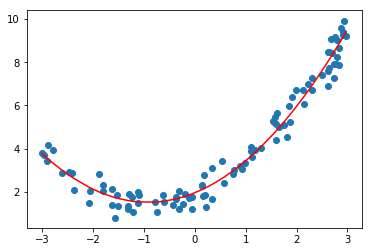

In [23]:
#pipeline
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,0.5,size=100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([("poly",PolynomialFeatures(degree=2)),("std_scaler",StandardScaler()),("lin_reg",LinearRegression())])
#送入的数据会沿着管道依次进行

poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')#不排序的话绘制出的图因为不是线性的，所以是乱的
plt.show()


